In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fashion_mnist=keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 40s 2us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [13]:
//normalizing data
x_train=x_train/255.0
x_test=x_test/255.0

SyntaxError: invalid syntax (1849482335.py, line 1)

In [4]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
model=keras.Sequential([
    layers.Reshape((28,28,1),input_shape=(28,28)),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])

C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [7]:
history=model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 54s 30ms/step - accuracy: 0.7625 - loss: 0.6544 - val_accuracy: 0.8618 - val_loss: 0.3704
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.8834 - loss: 0.3204 - val_accuracy: 0.8843 - val_loss: 0.3166
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 29ms/step - accuracy: 0.8987 - loss: 0.2721 - val_accuracy: 0.8997 - val_loss: 0.2751
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 31ms/step - accuracy: 0.9134 - loss: 0.2326 - val_accuracy: 0.9063 - val_loss: 0.2591
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 86s 33ms/step - accuracy: 0.9240 - loss: 0.2010 - val_accuracy: 0.9103 - val_loss: 0.2433
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9327 - loss: 0.1796 - val_accuracy: 0.9135 - val_loss: 0.2420
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.9428 - loss: 0.1569 - val_accuracy: 0.9114 - val_loss: 0.2565
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.9493 -

In [8]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9047 - loss: 0.2956
Test accuracy: 0.9071


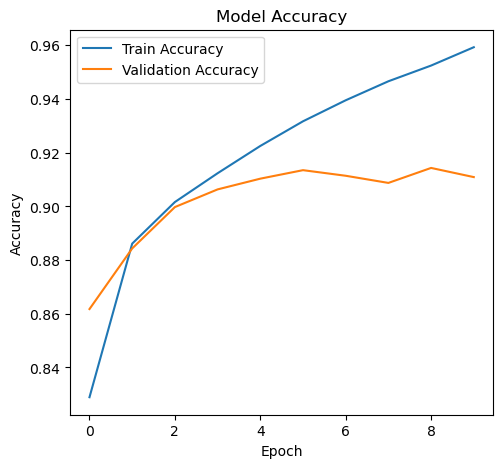

In [9]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

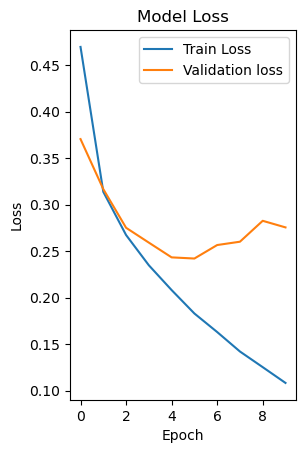

In [10]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [11]:
predictions=model.predict(x_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


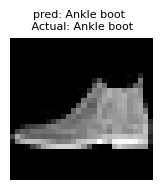

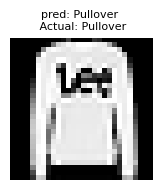

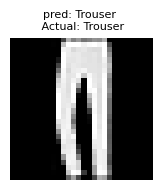

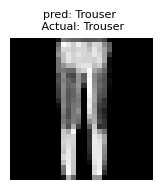

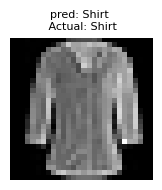

In [12]:
for i in range(5):
    plt.figure(figsize=(2,2))
    plt.imshow(x_test[i],cmap='gray')
    plt.title(f"pred: {class_names[np.argmax(predictions[i])]} \n Actual: {class_names[y_test[i]]}",fontsize=8)
    plt.axis('off')
    plt.tight_layout()
    plt.show()